In [1]:
import os

os.chdir("E:/235724_한국 부동산 데이터 시각화 경진대회_data")
print(os.getcwd())

E:\235724_한국 부동산 데이터 시각화 경진대회_data


In [48]:
import pandas as pd
import matplotlib as mpl
# 폰트 업데이트 하는 코드 -> 있어야 한글 쓸 수 있음 
mpl.font_manager._rebuild()
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import re

# 한글 사용
plt.rc('font', family='NanumBarunGothic') 

<문제정의>

# 갭투자

시세차익을 목적으로 주택 매매가와 전세가의 차액이 적은 집을 고르는 투자 방식

### <span style="color: red">갭투자하기 좋은 곳 == 매매가와 전세가의 차액이 적고 주택가격이 많이 오른 곳</span>

### <span style="color: red">투자시점 = 2020년 1월</span>

In [4]:
year_price=pd.read_csv('주택전세가격지수(KB).csv')
year_price

,Unnamed: 0,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
0,1986-01-01,17.601,35.506,18.059,10.793,9.782,16.755
1,1986-02-01,17.853,35.731,18.155,11.104,10.195,17.066
2,1986-03-01,18.273,36.553,18.823,11.446,10.550,17.573
3,1986-04-01,18.651,37.151,19.158,11.695,10.787,18.002
4,1986-05-01,18.693,37.151,19.301,11.726,10.875,18.040
...,...,...,...,...,...,...,...
418,2020-11-01,104.886,102.823,105.011,105.140,110.216,109.252
419,2020-12-01,106.043,103.249,105.711,106.608,112.406,110.887
420,2021-01-01,106.925,103.545,106.306,107.688,114.116,112.229
421,2021-02-01,107.730,103.887,106.959,108.651,115.372,113.272


In [5]:
buy_price=pd.read_csv('주택매매가격지수(KB).csv')
buy_price

,Unnamed: 0,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
0,1986-01-01,34.656,61.347,43.053,20.973,17.153,30.044
1,1986-02-01,34.656,61.347,42.925,20.973,17.183,30.044
2,1986-03-01,34.708,61.513,42.733,20.935,17.153,30.002
3,1986-04-01,34.449,61.097,42.733,20.819,17.034,29.837
4,1986-05-01,34.293,60.848,41.837,20.664,16.945,29.588
...,...,...,...,...,...,...,...
418,2020-11-01,107.125,104.334,106.398,107.506,114.853,112.139
419,2020-12-01,108.586,104.909,107.237,109.346,116.365,113.532
420,2021-01-01,109.878,105.303,107.895,111.005,118.230,114.974
421,2021-02-01,111.375,105.718,108.706,112.957,120.121,116.290


# 매매가와 전세가의 차액이 적은 곳

기존 지수를 원데이터로 돌리기 위하여 국토교통부(http://rtdown.molit.go.kr/)의 실거래가 데이터를 추가 활용

2019.01을 기준으로 표준화되어 있는 데이터를 원데이터의 형태로 변환



In [22]:
# 엑셀상에서 설명 삭제, 값 상에서 , 삭제

# 2019년 1월 아파트 매매 실거래가 평균 
apartement_buy_real=pd.read_excel('아파트(매매)_실거래가_20220215010431.xlsx')
apartement_buy=apartement_buy_real['거래금액(만원)'].mean()*10000
apartement_buy

246463306.64419162

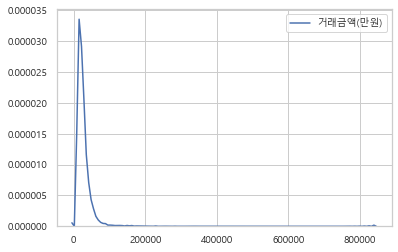

In [41]:
sns.kdeplot(apartement_buy_real['거래금액(만원)'])

In [27]:

# 2019년 1월 아파트 전세 보증금 평균 
apartement_year_real=pd.read_excel('아파트(전월세)_실거래가_20220215011801.xlsx')
apartement_year=apartement_year_real[apartement_year_real['전월세구분']=='전세' ]['보증금(만원)'].mean()*10000
apartement_year

260109225.93140215

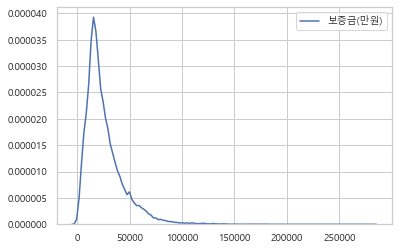

In [39]:
sns.kdeplot(apartement_year_real[apartement_year_real['전월세구분']=='전세' ]['보증금(만원)'])

In [31]:
# 2019년 1월 연립다세대 매매 실거래가 평균 
rowhouse_buy_real=pd.read_excel('연립다세대(매매)_실거래가_20220215012719.xlsx')
rowhouse_buy=rowhouse_buy_real['거래금액(만원)'].mean()*10000
rowhouse_buy

165320371.59636948

In [30]:
# 2019년 1월 연립다세대 전세 보증금 평균 
rowhouse_year_real=pd.read_excel('연립다세대(전월세)_실거래가_20220215012734.xlsx')
rowhouse_year=rowhouse_year_real[rowhouse_year_real['전월세구분']=='전세' ]['보증금(만원)'].mean()*10000
rowhouse_year

150279596.42521167

In [33]:
# 2019년 1월 단독다가구매매 실거래가 평균 
house_buy_real=pd.read_excel('단독다가구(매매)_실거래가_20220215012642.xlsx')
house_buy=rowhouse_buy_real['거래금액(만원)'].mean()*10000
house_buy

165320371.59636948

In [32]:
# 2019년 1월 단독다가구 전세 보증금 평균 
house_year_real=pd.read_excel('단독다가구(전월세)_실거래가_20220215013011.xlsx')
house_year=house_year_real[house_year_real['전월세구분']=='전세' ]['보증금(만원)'].mean()*10000
house_year

86561152.04568861

In [34]:
# 매매지수에서 전세지수를 뺀 값 
# 실거래 평균으로 바꾸어 계산 

house_index=buy_price['단독주택[2019.01=100]']*house_buy-year_price['단독주택[2019.01=100]']*house_year
rowhouse_index=buy_price['연립주택[2019.01=100]']*rowhouse_buy-year_price['연립주택[2019.01=100]']*rowhouse_year
apartment_index=buy_price['아파트[2019.01=100]']*apartement_buy-year_price['아파트[2019.01=100]']*apartement_year


In [35]:
date=buy_price['Unnamed: 0'][buy_price['Unnamed: 0']> '2019-12-01']
date

408    2020-01-01
409    2020-02-01
410    2020-03-01
411    2020-04-01
412    2020-05-01
413    2020-06-01
414    2020-07-01
415    2020-08-01
416    2020-09-01
417    2020-10-01
418    2020-11-01
419    2020-12-01
420    2021-01-01
421    2021-02-01
422    2021-03-01
Name: Unnamed: 0, dtype: object

In [36]:
#  상승률 비교
# 월별 평균 지수를 연초 시초가로 나눔
total_index_rate = np.array(total_index[408:])/total_index[408] - 1 
house_index_rate = np.array(house_index[408:])/house_index[408] - 1 
rowhouse_index_rate = np.array(rowhouse_index[408:])/rowhouse_index[408] - 1 
apartment_index_rate = np.array(apartment_index[408:])/apartment_index[408] - 1 
apartment_index_seoul_rate = np.array(apartment_index_seoul[408:])/apartment_index_seoul[408] - 1 
total_index_seoul_rate = np.array(total_index_seoul[408:])/total_index_seoul[408] - 1 

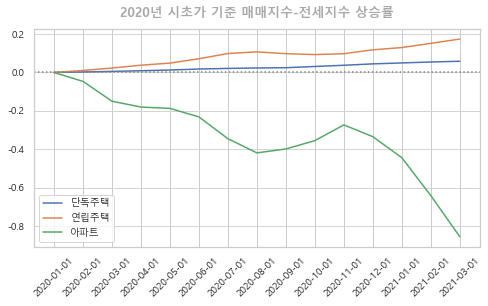

In [38]:
fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용
# 매매지수에서 전세지수를 뺀 값 


ax.plot(date,house_index_rate, label="단독주택")  
ax.plot(date,rowhouse_index_rate, label="연립주택")  
ax.plot(date,apartment_index_rate, label="아파트")  

sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False},
        style="whitegrid",
        font_scale=0.9)
plt.xticks(rotation = 45)

ax.set_title("2020년 시초가 기준 매매지수-전세지수 상승률", 
             fontweight="bold", fontsize="large", color="darkgray", pad=12)
ax.grid(axis="y", c="lightgray")
ax.axhline(y=0, c="gray", ls=":")
ax.legend()

## 전국으로 판단하니 아파트 가격이 저평가된 것처럼 보여진다

## -> 서울 아파트 데이터를 추가하여 확인하자

# 서울특별시 부동산 실거래가 정보를 가져와서 추가해보자

https://data.seoul.go.kr/dataList/OA-15548/S/1/datasetView.do

In [45]:
# 서울 2019년 실거래가 평균
# 2019년 1월 데이터가 없어서 2019년 데이터의 평균으로 근사

seoul_apartment=pd.read_csv('서울특별시_부동산_실거래가_정보_2019년.csv',encoding='cp949')
seoul_apartment_buy=seoul_apartment[seoul_apartment['건물주용도']=='아파트']['물건금액'].mean()
seoul_apartment_buy

821789511.7767463

In [49]:
def search_keyword(data):
    comprise = re.compile(r''+keyword)
    if comprise.search(str(data)):
        return True
    else:
        return False

In [50]:
# 서울 전세
keyword='서울'
seoul_apartement_year=apartement_year_real[apartement_year_real['시군구'].apply(search_keyword)][apartement_year_real['전월세구분']=='전세' ]['보증금(만원)'].mean()*10000
seoul_apartement_year

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


443732999.74792033

In [51]:
apartment_index_seoul=buy_price['아파트(서울)[2019.01=100]']*seoul_apartment_buy-year_price['아파트(서울)[2019.01=100]']*seoul_apartement_year

In [52]:
apartment_index_seoul

0      9.755559e+09
1      9.596951e+09
2      9.414772e+09
3      9.211815e+09
4      9.099627e+09
           ...     
418    4.547851e+10
419    4.574928e+10
420    4.652314e+10
421    4.751981e+10
422    4.842511e+10
Name: 아파트(서울)[2019.01=100], Length: 423, dtype: float64

In [53]:
apartment_index_seoul_rate = np.array(apartment_index_seoul[408:])/apartment_index_seoul[408] - 1 

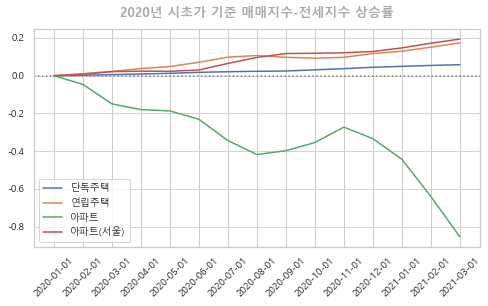

In [55]:
fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용
# 매매지수에서 전세지수를 뺀 값 


ax.plot(date,house_index_rate, label="단독주택")  
ax.plot(date,rowhouse_index_rate, label="연립주택")  
ax.plot(date,apartment_index_rate, label="아파트")  
ax.plot(date,apartment_index_seoul_rate, label="아파트(서울)") 

sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False},
        style="whitegrid",
        font_scale=0.9)
plt.xticks(rotation = 45)

ax.set_title("2020년 시초가 기준 매매지수-전세지수 상승률", 
             fontweight="bold", fontsize="large", color="darkgray", pad=12)
sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False},
        style="whitegrid",
        font_scale=0.9)
ax.grid(axis="y", c="lightgray")
ax.axhline(y=0, c="gray", ls=":")
ax.legend()

In [88]:
blue = np.array([52, 117, 162])/255   # np.array([12, 77, 162])/255
yellow = np.array([230, 207, 1])/255  # np.array([250, 227, 1])/255
red = np.array([203, 10, 55])/255
green = np.array([1, 44, 95])/255

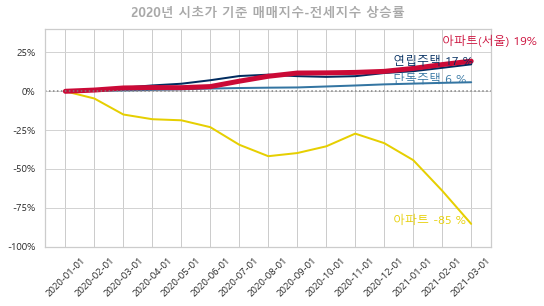

In [125]:
fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용
# 매매지수에서 전세지수를 뺀 값 


ax.plot(date,house_index_rate,lw=2,c=blue,  label="단독주택")  
ax.plot(date,rowhouse_index_rate,lw=2,c=green,  label="연립주택")  
ax.plot(date,apartment_index_rate,lw=2,c=yellow,  label="아파트")  
ax.plot(date,apartment_index_seoul_rate,lw=5, c=red, label="아파트(서울)") 

sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False},
        style="whitegrid",
        font_scale=0.9)
plt.xticks(rotation = 45)

ax.set_title("2020년 시초가 기준 매매지수-전세지수 상승률", 
             fontweight="bold", fontsize="large", color="darkgray", pad=12)
sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False},
        style="whitegrid",
        font_scale=0.9)

# 상승률 *

rates = [ apartment_index_rate[-1], rowhouse_index_rate[-1], house_index_rate[-1]]

companies = [ "아파트", "연립주택", "단독주택"]
colors = [ yellow,green, blue]
for r, co,c in zip(rates, companies, colors):
    ax.text(11.3, r, f"{co} {r*100:.0f} %", color=c,  fontsize=12)

plt.text(13,0.3,"아파트(서울) 19%",color=red,fontsize=12 )


yticks = np.arange(-5, 0.4, 0.25)
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y*100:.0f}%" for y in yticks])
ax.set_ylim(-1,0.4 )
ax.grid(axis="y", c="lightgray")
ax.axhline(y=0, c="gray", ls=":")
